In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Let's start by importing and inspecting the dataset. For example, checking columns, dataset size, important values ​​using describe(), null values ​​and whether there are duplicates

In [2]:
df = pd.read_csv(r"StudentsPerformance.csv")

In [3]:
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


There are no duplicate values ​​and null values, therefore the dataset does not need treatments.

Now, let's start with EDA. Firstly creating the GPA (average of grades between math, reading and writing score) and then checking the outliers.

In [7]:
df["GPA"] = round(df.iloc[:, 5:].mean(axis=1),2)
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score    GPA  
0                      none          72             72  

In [8]:
def limites(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr
def create_outliers(df, name_column):
    lim_inf, lim_sup = limites(df[name_column])
    df_inf = df.loc[(df[name_column] <= lim_inf), :]
    df_sup = df.loc[(df[name_column] >= lim_sup), :]
    return df_inf,  df_sup

In [9]:
limites(df['GPA'])
df_inf, df_sup =create_outliers(df, 'GPA')

In [10]:
display(df_inf)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
17,female,group B,some high school,free/reduced,none,18,32,28,26.00
59,female,group C,some high school,free/reduced,none,0,17,10,9.00
76,male,group E,some high school,standard,none,30,26,22,26.00
327,male,group A,some college,free/reduced,none,28,23,19,23.33
596,male,group B,high school,free/reduced,none,30,24,15,23.00
980,female,group B,high school,free/reduced,none,8,24,23,18.33


In [11]:
display(df_sup)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA


Because we have a limit of scores up to 100, the dataset does not have higher outliers. And the bottom outliers are just 6, representing just 0.6% of the total.

In this case we will keep the outliers.

Now let's visually analyze the GPA values ​​between the categorical variables.

In [12]:
#analyzing all df
print(df.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'GPA']


In [13]:
aux_list = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


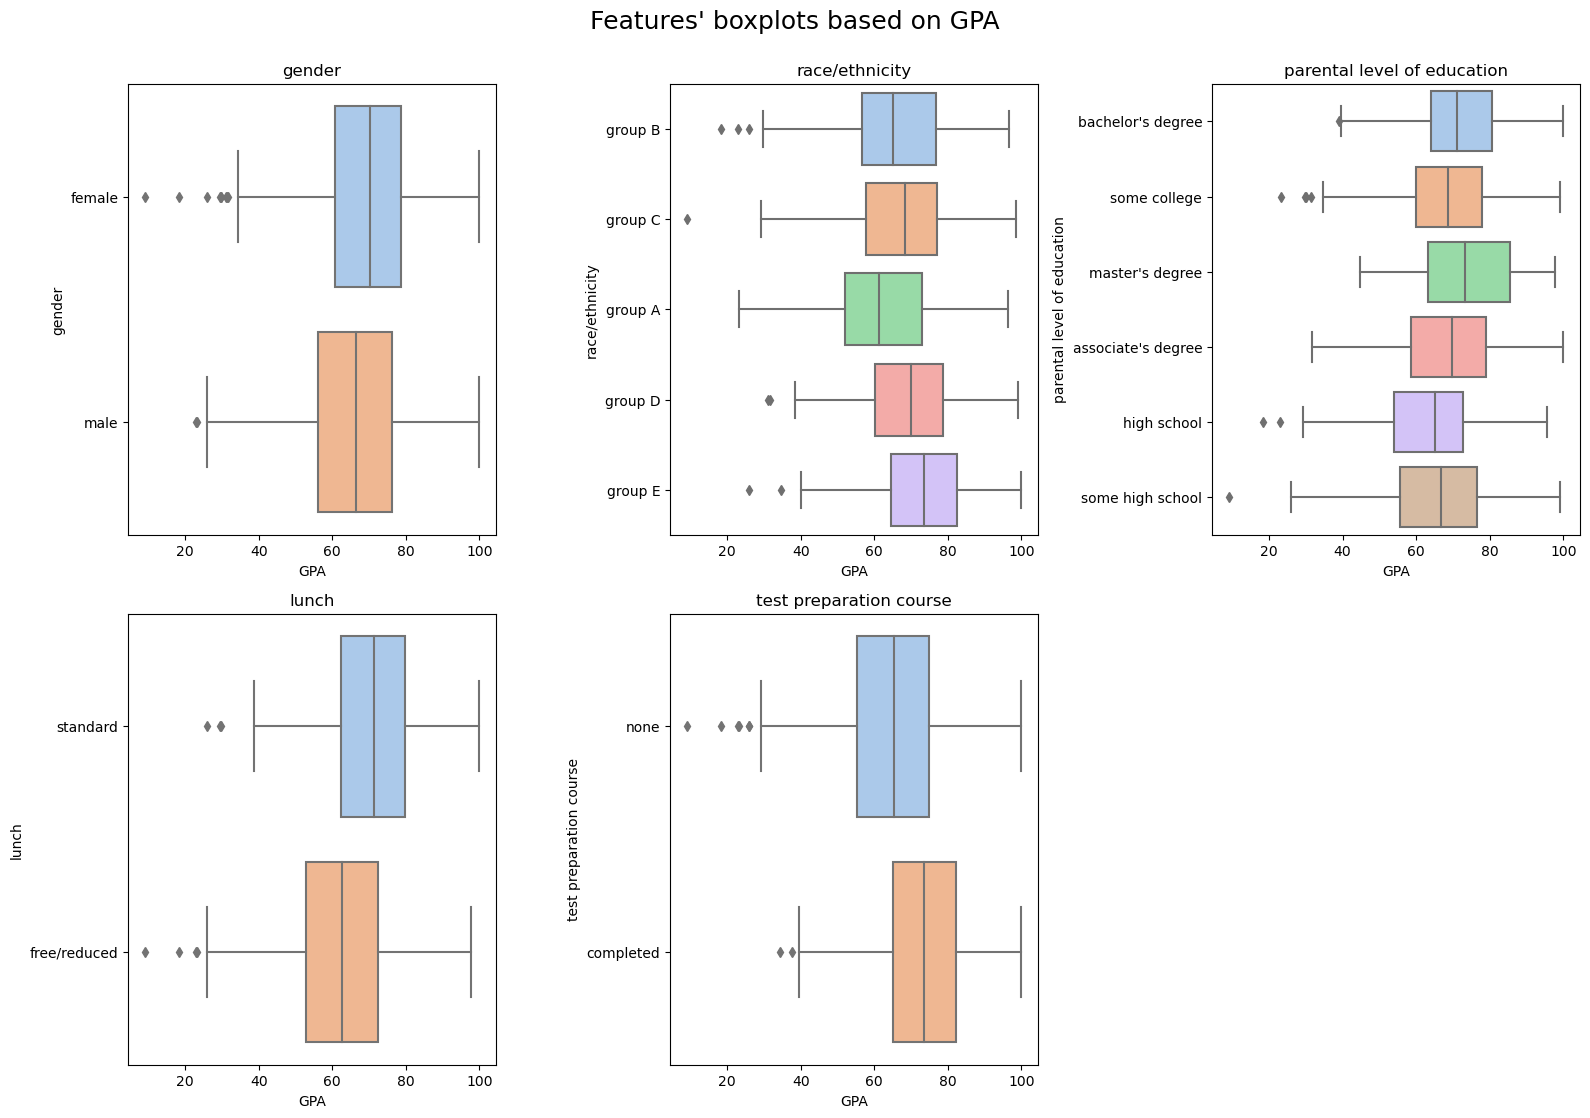

In [14]:
sns.set_palette('pastel')
fig = plt.figure(figsize = (16,16))
for i, feature in enumerate(aux_list,1):
    plt.subplot(3,3,i)
    sns.boxplot(data = df, y = feature, x = 'GPA')
    plt.legend(loc='upper left',frameon=False)
    plt.title(feature)
    
fig.suptitle('Features\' boxplots based on GPA', fontsize=18, y = 1)
plt.tight_layout()

In [15]:
# Compare the mean grades for each category
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print(f'{col}:')
    print(df.groupby(col)['GPA'].mean())
    print()

gender:
gender
female    69.569498
male      65.837303
Name: GPA, dtype: float64

race/ethnicity:
race/ethnicity
group A    62.992135
group B    65.468579
group C    67.131567
group D    69.179389
group E    72.752000
Name: GPA, dtype: float64

parental level of education:
parental level of education
associate's degree    69.568964
bachelor's degree     71.923983
high school           63.097194
master's degree       73.598644
some college          68.476106
some high school      65.107654
Name: GPA, dtype: float64

lunch:
lunch
free/reduced    62.198986
standard        70.837116
Name: GPA, dtype: float64

test preparation course:
test preparation course
completed    72.669469
none         65.038801
Name: GPA, dtype: float64



Through the boxplot graphs and calculated averages we can note some important points for analysis:

Gender: Female has a larger mean and distribution.

Perental level education: High school and some high schools have significantly smaller distributions and means than the others.

Lunch: Standard has an average of approximately 14% larger.

Test preparation course: Completed has an average of approximately 12% higher.

Race/Ethnicity: Group E has a significantly higher mean and distribution than the others. Would this group have a greater concentration of the variables with the highest mean? (Standard, test preparation completed, etc.)

Let's check the distribution of variables within each existing classification in 'race/ethnicity'.

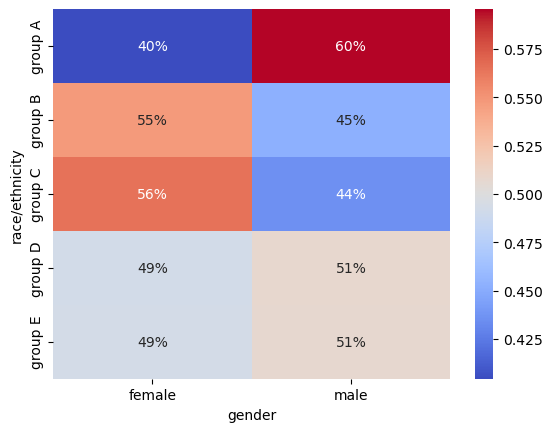

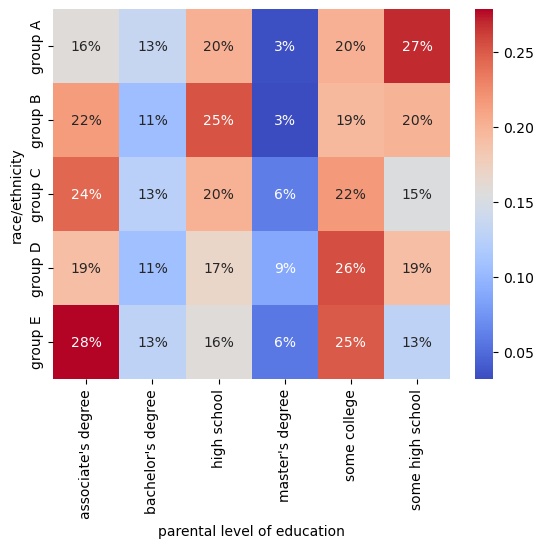

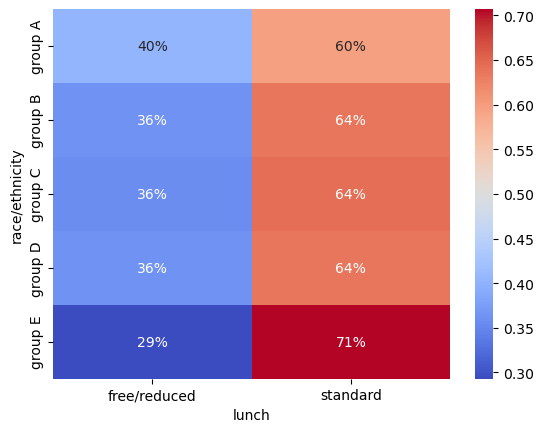

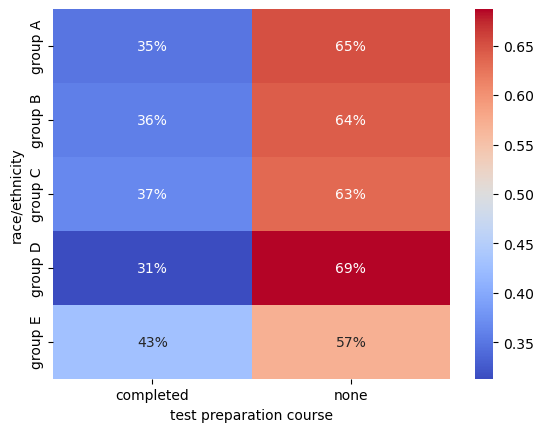

In [16]:

aux_list.remove('race/ethnicity')
for col in aux_list:
    counts = pd.crosstab(df['race/ethnicity'], df[col], normalize='index')
    sns.heatmap(counts, annot=True, fmt='.0%', cmap='coolwarm')
    plt.show()

As we can see, they have a much higher concentration of lunch = standard and test preparation course = completed.

So let's check the variables that have the greatest relationship with GPA.

The Kruskal-Wallis test is an appropriate choice, as it allows us to compare the medians of independent samples, assuming that the data does not follow a normal distribution.

In [17]:
p_values = []

for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    result = kruskal(*[df['GPA'][df[col]==level] for level in df[col].unique()])
    p_values.append((col, result.pvalue))

for col, p_value in p_values:
    print(f'P-value for {col}: {p_value}')

most_influential = min(p_values, key=lambda x:x[1])
print(f'\nMost influential variable:\ {most_influential[0]}')

P-value for gender: 1.2608188595603227e-05
P-value for race/ethnicity: 2.661663257888385e-07
P-value for parental level of education: 1.6475581789018132e-08
P-value for lunch: 1.75999087825629e-18
P-value for test preparation course: 6.19718538170756e-16

Most influential variable:\ lunch


Through the test it is noted that lunch is the most influential variable, followed by test preparation course, that is, the highest concentrations of group E.

In order to create action plans to increase the averages of students with the worst grades, we will cluster the dataset to make this action more efficient.
This method is useful for distributing efforts and budgets if they are limited.

In [18]:
#transforming all data in numbers, so that we can perform mathematical operations on them
df_dum = pd.get_dummies(df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dum)

inertia = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\fer_l\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\fer_l\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\fer_l\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\fer_l\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

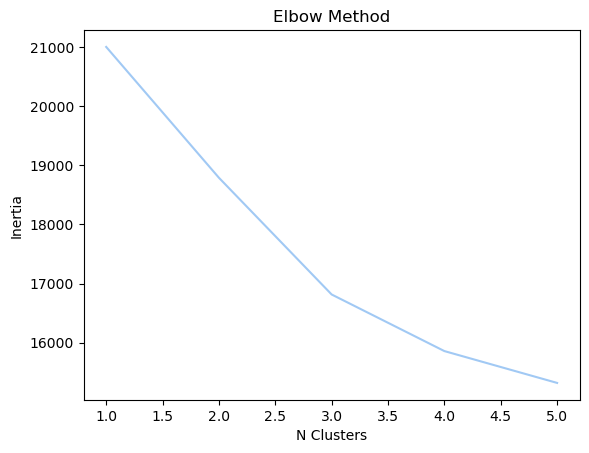

In [19]:
#plotting elbow method to decide the optimal number of clusters
plt.plot(range(1, 6), inertia)
plt.title('Elbow Method')
plt.xlabel('N Clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
#clustering with  k-means and n = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

c:\Users\fer_l\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: xlabel='Cluster', ylabel='GPA'>

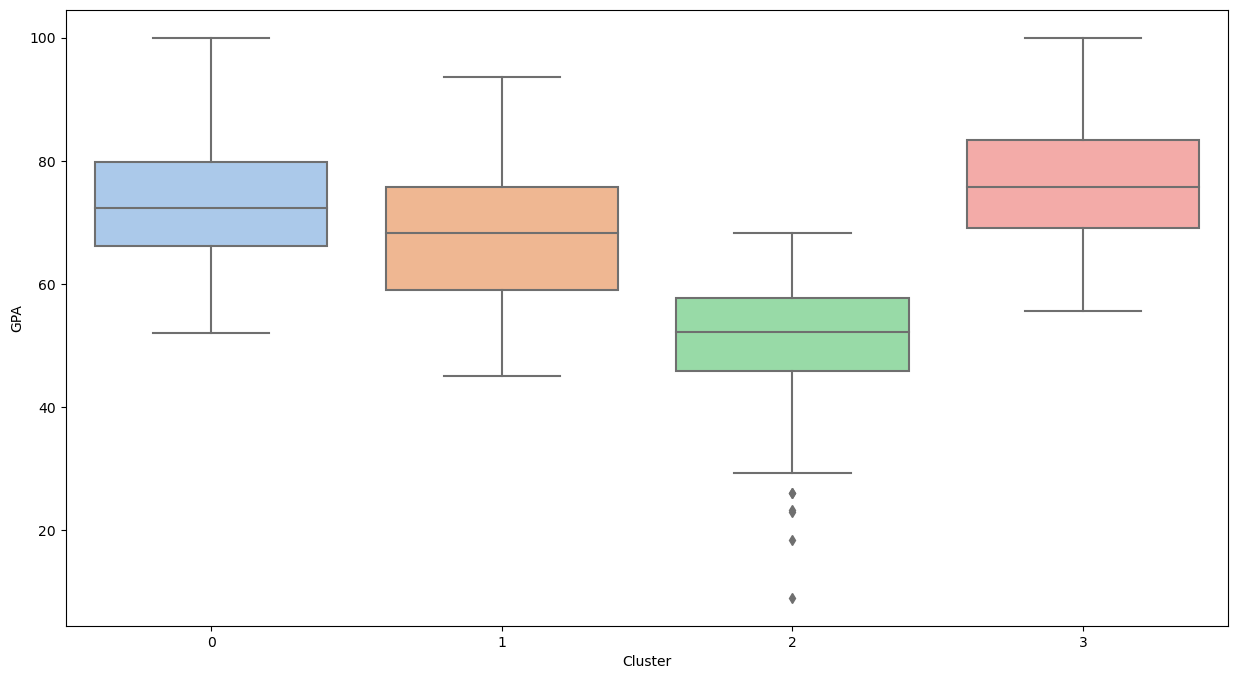

In [21]:
#analyzing clusters
sns.set_palette('pastel')
fig = plt.figure(figsize = (15,8))
sns.boxplot(data = df, x = 'Cluster', y = 'GPA')

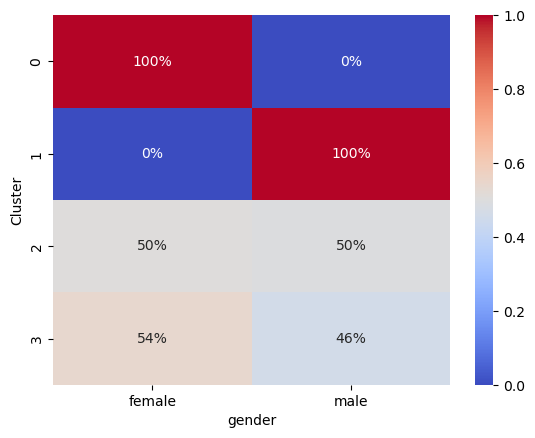

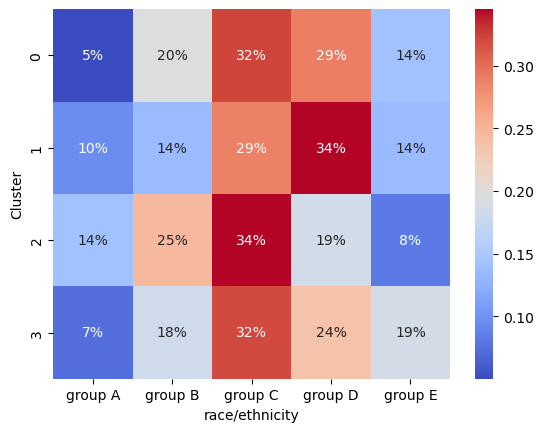

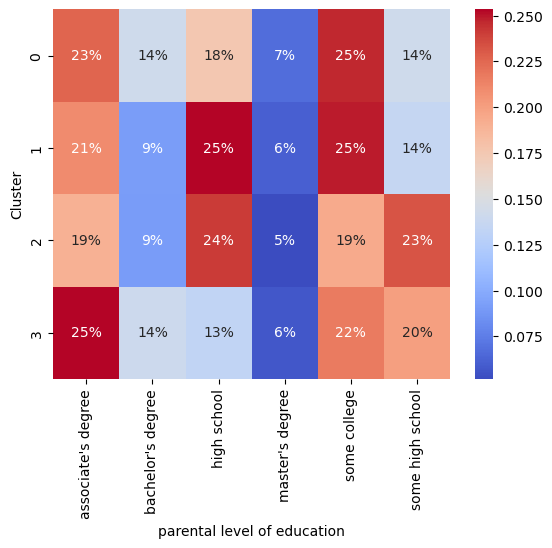

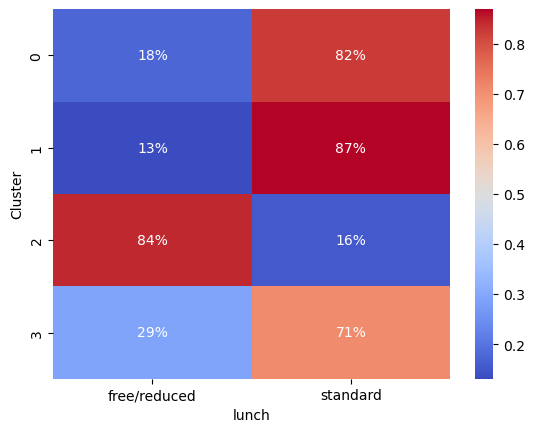

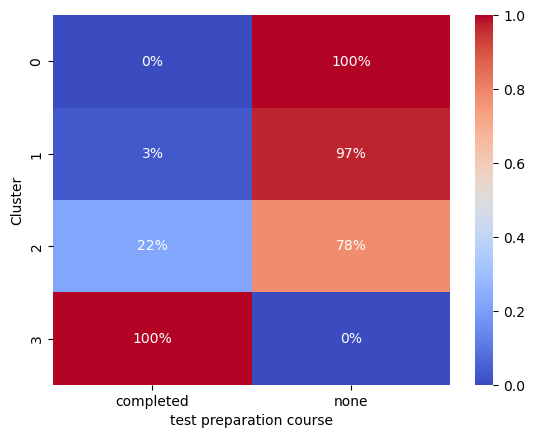

In [22]:
aux_list2 = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in aux_list2:
    counts = pd.crosstab(df['Cluster'], df[col], normalize='index')
    sns.heatmap(counts, annot=True, fmt='.0%', cmap='coolwarm')
    plt.show()

In [23]:
#calculating the mean
print(df.groupby('Cluster')['GPA'].mean())
print(df['GPA'].mean())

Cluster
0    73.443180
1    67.309956
2    50.930991
3    76.625633
Name: GPA, dtype: float64
67.77057999999998


3    300
0    239
2    232
1    229
Name: Cluster, dtype: int64


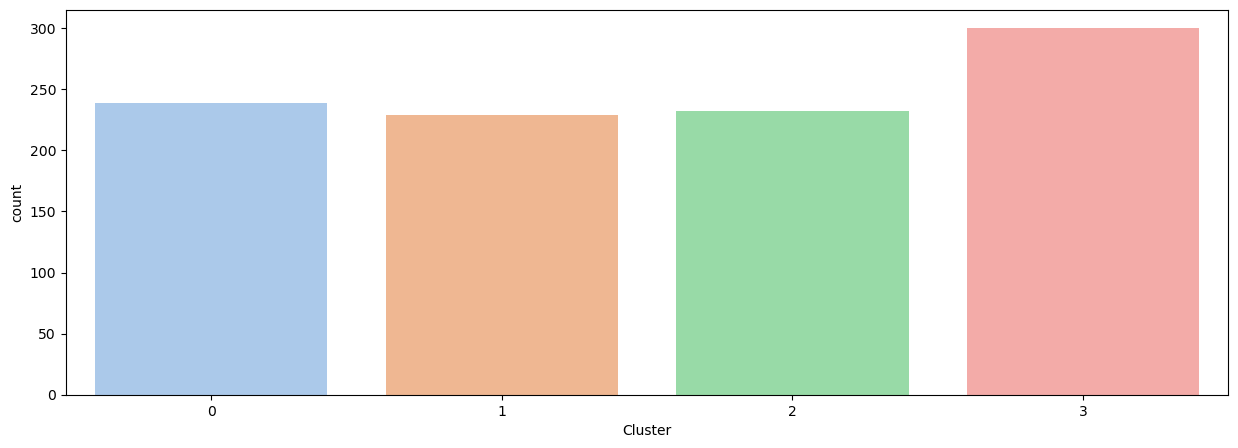

In [24]:
#calculating the number per cluster
print(df['Cluster'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='Cluster', data=df)
plt.show()

Through the analysis we can notice that groups 1 (average of 67.3) and 2 (average of 50.9) were below the general average of 67.8.

For group 1, the average can be increased if we include more preparatory tests.

For group 2, in addition to including a preparatory course, it would also be necessary to change the students' course.

We can still notice that group 0 does not have a preparatory course, but the average is compensated due to the concentration of the other variables.

It is worth highlighting that the variables gender, parental level of education and race/ethnicity are fixed variables, which cannot be changed or boosted through actions.